In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder

In [2]:
df = pd.read_csv('mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [5]:
df.shape

(8124, 23)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='class', ylabel='count'>

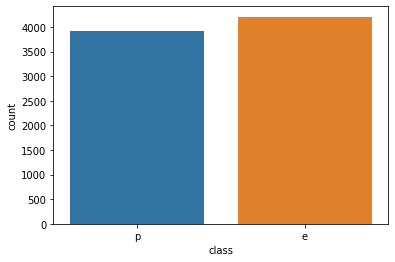

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df['class'])

In [7]:
objList = df.select_dtypes(include = "object").columns #
print (objList)

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')


In [8]:
from sklearn.preprocessing import LabelEncoder #encoder package of sklearn
le = LabelEncoder() #le variable has been assigned a labelencoder function

for Shiv in objList:
    df[Shiv] = le.fit_transform(df[Shiv].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   int32
 1   cap-shape                 8124 non-null   int32
 2   cap-surface               8124 non-null   int32
 3   cap-color                 8124 non-null   int32
 4   bruises                   8124 non-null   int32
 5   odor                      8124 non-null   int32
 6   gill-attachment           8124 non-null   int32
 7   gill-spacing              8124 non-null   int32
 8   gill-size                 8124 non-null   int32
 9   gill-color                8124 non-null   int32
 10  stalk-shape               8124 non-null   int32
 11  stalk-root                8124 non-null   int32
 12  stalk-surface-above-ring  8124 non-null   int32
 13  stalk-surface-below-ring  8124 non-null   int32
 14  stalk-color-above-ring    8124 non-null 

In [9]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [10]:
df = df.drop(['odor','gill-color'], axis=1)

In [11]:
X_df = df.drop('class', axis=1)
y = df['class']

X_df.shape,y.shape

((8124, 20), (8124,))

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size = 0.2, random_state = 10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6499, 20), (1625, 20), (6499,), (1625,))

# Bagging 

In [13]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [14]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,max_samples=500, bootstrap=True, n_jobs=-1)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [15]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,max_samples=500,bootstrap=True, oob_score=True, n_jobs=-1)

bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

1.0

In [16]:
bag_clf.oob_score_

1.0

In [17]:
bag_clf = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500,max_samples=500,bootstrap=False, n_jobs=-1)

bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

1.0

In [18]:
bag_clf = BaggingClassifier(LogisticRegression(), n_estimators=500,max_samples=500,bootstrap=True, oob_score=True, n_jobs=-1)

bag_clf.fit(X_train, y_train)

y_pred = bag_clf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9421538461538461

# GB

In [19]:
import time
start = time.time()
from sklearn.ensemble import GradientBoostingClassifier
reg = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1,random_state=0)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(reg.score(X_train,y_train))
end = time.time()
print(end-start)

0.9864615384615385
0.9892291121711032
0.4109477996826172


Feature importances:
[8.06205786e-05 4.00119393e-03 7.94065917e-03 0.00000000e+00
 0.00000000e+00 3.21339678e-02 4.09100517e-01 0.00000000e+00
 4.72811947e-03 3.53344234e-02 7.17778972e-03 1.48423885e-03
 8.20790436e-04 0.00000000e+00 1.58211013e-03 8.39310692e-03
 1.72135552e-03 4.67411968e-01 7.65913755e-03 1.04300019e-02]


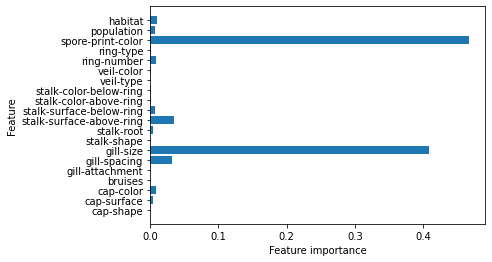

In [20]:
print("Feature importances:\n{}".format(reg.feature_importances_))
import matplotlib.pyplot as plt
def plot_feature_importances(model):
    n_features = X_df.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_df.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(reg)

# AdaBoost

In [21]:
import time
start = time.time()
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
ada_clf = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),n_estimators=200, learning_rate=0.2)
ada_clf.fit(X_train, y_train)
y_pred = ada_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(ada_clf.score(X_train,y_train))
end = time.time()
print(end-start)

0.9686153846153847
0.96661024773042
1.794327735900879


# XgBoost

In [22]:
import time
start = time.time()
import xgboost as xgb
xgb_clf = xgb.XGBClassifier(eta=0.5, max_depth=12)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(xgb_clf.score(X_train,y_train))
end = time.time()
print(end-start)

1.0
1.0
0.34236788749694824


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
gbrt = GradientBoostingClassifier()
param_grid = {'n_estimators':[10,50,100,500], 'learning_rate':[0.001,0.01,0.1],'max_depth':range(5,10,2)}

grid = GridSearchCV(gbrt, param_grid, refit = True, verbose=3, cv=cv)
grid.fit(X_train,y_train)

Fitting 30 folds for each of 36 candidates, totalling 1080 fits
[CV 1/30] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=0.515 total time=   0.0s
[CV 2/30] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=0.515 total time=   0.0s
[CV 3/30] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=0.515 total time=   0.0s
[CV 4/30] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=0.515 total time=   0.0s
[CV 5/30] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=0.515 total time=   0.0s
[CV 6/30] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=0.515 total time=   0.0s
[CV 7/30] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=0.515 total time=   0.0s
[CV 8/30] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=0.514 total time=   0.0s
[CV 9/30] END learning_rate=0.001, max_depth=5, n_estimators=10;, score=0.514 total time=   0.0s
[CV 10/30] END learning_rate=0.001, max_depth=5, n_estimators=1

[CV 24/30] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.991 total time=   1.1s
[CV 25/30] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.992 total time=   1.0s
[CV 26/30] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.986 total time=   1.1s
[CV 27/30] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.997 total time=   1.1s
[CV 28/30] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.989 total time=   1.0s
[CV 29/30] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.985 total time=   1.2s
[CV 30/30] END learning_rate=0.001, max_depth=5, n_estimators=100;, score=0.994 total time=   1.0s
[CV 1/30] END learning_rate=0.001, max_depth=5, n_estimators=500;, score=0.986 total time=   5.5s
[CV 2/30] END learning_rate=0.001, max_depth=5, n_estimators=500;, score=0.998 total time=   5.7s
[CV 3/30] END learning_rate=0.001, max_depth=5, n_estimators=500;, score=0.995 total time=   5.6s
[CV 4/30] END

[CV 18/30] END learning_rate=0.001, max_depth=7, n_estimators=50;, score=1.000 total time=   0.7s
[CV 19/30] END learning_rate=0.001, max_depth=7, n_estimators=50;, score=1.000 total time=   0.7s
[CV 20/30] END learning_rate=0.001, max_depth=7, n_estimators=50;, score=1.000 total time=   0.7s
[CV 21/30] END learning_rate=0.001, max_depth=7, n_estimators=50;, score=1.000 total time=   0.6s
[CV 22/30] END learning_rate=0.001, max_depth=7, n_estimators=50;, score=1.000 total time=   0.6s
[CV 23/30] END learning_rate=0.001, max_depth=7, n_estimators=50;, score=1.000 total time=   0.6s
[CV 24/30] END learning_rate=0.001, max_depth=7, n_estimators=50;, score=1.000 total time=   0.6s
[CV 25/30] END learning_rate=0.001, max_depth=7, n_estimators=50;, score=1.000 total time=   0.6s
[CV 26/30] END learning_rate=0.001, max_depth=7, n_estimators=50;, score=1.000 total time=   0.6s
[CV 27/30] END learning_rate=0.001, max_depth=7, n_estimators=50;, score=1.000 total time=   0.6s
[CV 28/30] END learn

[CV 12/30] END learning_rate=0.001, max_depth=9, n_estimators=10;, score=0.515 total time=   0.1s
[CV 13/30] END learning_rate=0.001, max_depth=9, n_estimators=10;, score=0.515 total time=   0.0s
[CV 14/30] END learning_rate=0.001, max_depth=9, n_estimators=10;, score=0.515 total time=   0.0s
[CV 15/30] END learning_rate=0.001, max_depth=9, n_estimators=10;, score=0.515 total time=   0.0s
[CV 16/30] END learning_rate=0.001, max_depth=9, n_estimators=10;, score=0.515 total time=   0.0s
[CV 17/30] END learning_rate=0.001, max_depth=9, n_estimators=10;, score=0.515 total time=   0.1s
[CV 18/30] END learning_rate=0.001, max_depth=9, n_estimators=10;, score=0.514 total time=   0.1s
[CV 19/30] END learning_rate=0.001, max_depth=9, n_estimators=10;, score=0.514 total time=   0.0s
[CV 20/30] END learning_rate=0.001, max_depth=9, n_estimators=10;, score=0.515 total time=   0.0s
[CV 21/30] END learning_rate=0.001, max_depth=9, n_estimators=10;, score=0.515 total time=   0.1s
[CV 22/30] END learn

[CV 6/30] END learning_rate=0.001, max_depth=9, n_estimators=500;, score=1.000 total time=   7.1s
[CV 7/30] END learning_rate=0.001, max_depth=9, n_estimators=500;, score=1.000 total time=   7.4s
[CV 8/30] END learning_rate=0.001, max_depth=9, n_estimators=500;, score=1.000 total time=   7.1s
[CV 9/30] END learning_rate=0.001, max_depth=9, n_estimators=500;, score=1.000 total time=   7.1s
[CV 10/30] END learning_rate=0.001, max_depth=9, n_estimators=500;, score=1.000 total time=   7.1s
[CV 11/30] END learning_rate=0.001, max_depth=9, n_estimators=500;, score=1.000 total time=   7.0s
[CV 12/30] END learning_rate=0.001, max_depth=9, n_estimators=500;, score=1.000 total time=   6.2s
[CV 13/30] END learning_rate=0.001, max_depth=9, n_estimators=500;, score=1.000 total time=   8.7s
[CV 14/30] END learning_rate=0.001, max_depth=9, n_estimators=500;, score=1.000 total time=   6.9s
[CV 15/30] END learning_rate=0.001, max_depth=9, n_estimators=500;, score=1.000 total time=   7.0s
[CV 16/30] END

[CV 1/30] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.992 total time=   1.0s
[CV 2/30] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.998 total time=   1.0s
[CV 3/30] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.995 total time=   1.0s
[CV 4/30] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.992 total time=   1.0s
[CV 5/30] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.991 total time=   1.0s
[CV 6/30] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.998 total time=   1.0s
[CV 7/30] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.992 total time=   1.0s
[CV 8/30] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.989 total time=   1.0s
[CV 9/30] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.994 total time=   1.0s
[CV 10/30] END learning_rate=0.01, max_depth=5, n_estimators=100;, score=0.992 total time=   1.0s
[CV 11/30] END learning_rate=

[CV 26/30] END learning_rate=0.01, max_depth=7, n_estimators=10;, score=1.000 total time=   0.0s
[CV 27/30] END learning_rate=0.01, max_depth=7, n_estimators=10;, score=1.000 total time=   0.0s
[CV 28/30] END learning_rate=0.01, max_depth=7, n_estimators=10;, score=1.000 total time=   0.0s
[CV 29/30] END learning_rate=0.01, max_depth=7, n_estimators=10;, score=1.000 total time=   0.0s
[CV 30/30] END learning_rate=0.01, max_depth=7, n_estimators=10;, score=1.000 total time=   0.0s
[CV 1/30] END learning_rate=0.01, max_depth=7, n_estimators=50;, score=1.000 total time=   0.6s
[CV 2/30] END learning_rate=0.01, max_depth=7, n_estimators=50;, score=1.000 total time=   0.6s
[CV 3/30] END learning_rate=0.01, max_depth=7, n_estimators=50;, score=1.000 total time=   0.6s
[CV 4/30] END learning_rate=0.01, max_depth=7, n_estimators=50;, score=1.000 total time=   0.6s
[CV 5/30] END learning_rate=0.01, max_depth=7, n_estimators=50;, score=1.000 total time=   0.6s
[CV 6/30] END learning_rate=0.01, m

[CV 21/30] END learning_rate=0.01, max_depth=7, n_estimators=500;, score=1.000 total time=   6.4s
[CV 22/30] END learning_rate=0.01, max_depth=7, n_estimators=500;, score=1.000 total time=   6.4s
[CV 23/30] END learning_rate=0.01, max_depth=7, n_estimators=500;, score=1.000 total time=   6.4s
[CV 24/30] END learning_rate=0.01, max_depth=7, n_estimators=500;, score=1.000 total time=   6.4s
[CV 25/30] END learning_rate=0.01, max_depth=7, n_estimators=500;, score=1.000 total time=   6.3s
[CV 26/30] END learning_rate=0.01, max_depth=7, n_estimators=500;, score=1.000 total time=   6.3s
[CV 27/30] END learning_rate=0.01, max_depth=7, n_estimators=500;, score=1.000 total time=   6.4s
[CV 28/30] END learning_rate=0.01, max_depth=7, n_estimators=500;, score=1.000 total time=   6.3s
[CV 29/30] END learning_rate=0.01, max_depth=7, n_estimators=500;, score=1.000 total time=   6.3s
[CV 30/30] END learning_rate=0.01, max_depth=7, n_estimators=500;, score=1.000 total time=   6.4s
[CV 1/30] END learni

[CV 16/30] END learning_rate=0.01, max_depth=9, n_estimators=100;, score=1.000 total time=   1.3s
[CV 17/30] END learning_rate=0.01, max_depth=9, n_estimators=100;, score=1.000 total time=   1.3s
[CV 18/30] END learning_rate=0.01, max_depth=9, n_estimators=100;, score=1.000 total time=   1.3s
[CV 19/30] END learning_rate=0.01, max_depth=9, n_estimators=100;, score=1.000 total time=   1.3s
[CV 20/30] END learning_rate=0.01, max_depth=9, n_estimators=100;, score=1.000 total time=   1.3s
[CV 21/30] END learning_rate=0.01, max_depth=9, n_estimators=100;, score=1.000 total time=   1.3s
[CV 22/30] END learning_rate=0.01, max_depth=9, n_estimators=100;, score=1.000 total time=   1.3s
[CV 23/30] END learning_rate=0.01, max_depth=9, n_estimators=100;, score=1.000 total time=   1.3s
[CV 24/30] END learning_rate=0.01, max_depth=9, n_estimators=100;, score=1.000 total time=   1.3s
[CV 25/30] END learning_rate=0.01, max_depth=9, n_estimators=100;, score=1.000 total time=   1.4s
[CV 26/30] END learn

[CV 11/30] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=1.000 total time=   0.5s
[CV 12/30] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=1.000 total time=   0.5s
[CV 13/30] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=1.000 total time=   0.5s
[CV 14/30] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=1.000 total time=   0.5s
[CV 15/30] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=1.000 total time=   0.5s
[CV 16/30] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=1.000 total time=   0.5s
[CV 17/30] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=1.000 total time=   0.5s
[CV 18/30] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=1.000 total time=   0.5s
[CV 19/30] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=1.000 total time=   0.5s
[CV 20/30] END learning_rate=0.1, max_depth=5, n_estimators=50;, score=1.000 total time=   0.5s
[CV 21/30] END learning_rate=0.1, max_de

[CV 6/30] END learning_rate=0.1, max_depth=7, n_estimators=10;, score=1.000 total time=   0.0s
[CV 7/30] END learning_rate=0.1, max_depth=7, n_estimators=10;, score=1.000 total time=   0.0s
[CV 8/30] END learning_rate=0.1, max_depth=7, n_estimators=10;, score=1.000 total time=   0.0s
[CV 9/30] END learning_rate=0.1, max_depth=7, n_estimators=10;, score=1.000 total time=   0.0s
[CV 10/30] END learning_rate=0.1, max_depth=7, n_estimators=10;, score=1.000 total time=   0.0s
[CV 11/30] END learning_rate=0.1, max_depth=7, n_estimators=10;, score=1.000 total time=   0.0s
[CV 12/30] END learning_rate=0.1, max_depth=7, n_estimators=10;, score=1.000 total time=   0.0s
[CV 13/30] END learning_rate=0.1, max_depth=7, n_estimators=10;, score=1.000 total time=   0.0s
[CV 14/30] END learning_rate=0.1, max_depth=7, n_estimators=10;, score=1.000 total time=   0.0s
[CV 15/30] END learning_rate=0.1, max_depth=7, n_estimators=10;, score=1.000 total time=   0.0s
[CV 16/30] END learning_rate=0.1, max_depth=

[CV 2/30] END learning_rate=0.1, max_depth=7, n_estimators=500;, score=1.000 total time=   6.0s
[CV 3/30] END learning_rate=0.1, max_depth=7, n_estimators=500;, score=1.000 total time=   6.0s
[CV 4/30] END learning_rate=0.1, max_depth=7, n_estimators=500;, score=1.000 total time=   6.1s
[CV 5/30] END learning_rate=0.1, max_depth=7, n_estimators=500;, score=1.000 total time=   6.0s
[CV 6/30] END learning_rate=0.1, max_depth=7, n_estimators=500;, score=1.000 total time=   6.0s
[CV 7/30] END learning_rate=0.1, max_depth=7, n_estimators=500;, score=1.000 total time=   6.0s
[CV 8/30] END learning_rate=0.1, max_depth=7, n_estimators=500;, score=1.000 total time=   6.1s
[CV 9/30] END learning_rate=0.1, max_depth=7, n_estimators=500;, score=1.000 total time=   6.1s
[CV 10/30] END learning_rate=0.1, max_depth=7, n_estimators=500;, score=1.000 total time=   6.0s
[CV 11/30] END learning_rate=0.1, max_depth=7, n_estimators=500;, score=1.000 total time=   6.0s
[CV 12/30] END learning_rate=0.1, max_

[CV 28/30] END learning_rate=0.1, max_depth=9, n_estimators=50;, score=1.000 total time=   0.6s
[CV 29/30] END learning_rate=0.1, max_depth=9, n_estimators=50;, score=1.000 total time=   0.6s
[CV 30/30] END learning_rate=0.1, max_depth=9, n_estimators=50;, score=1.000 total time=   0.6s
[CV 1/30] END learning_rate=0.1, max_depth=9, n_estimators=100;, score=1.000 total time=   1.3s
[CV 2/30] END learning_rate=0.1, max_depth=9, n_estimators=100;, score=1.000 total time=   1.3s
[CV 3/30] END learning_rate=0.1, max_depth=9, n_estimators=100;, score=1.000 total time=   1.3s
[CV 4/30] END learning_rate=0.1, max_depth=9, n_estimators=100;, score=1.000 total time=   1.3s
[CV 5/30] END learning_rate=0.1, max_depth=9, n_estimators=100;, score=1.000 total time=   1.3s
[CV 6/30] END learning_rate=0.1, max_depth=9, n_estimators=100;, score=1.000 total time=   1.3s
[CV 7/30] END learning_rate=0.1, max_depth=9, n_estimators=100;, score=1.000 total time=   1.3s
[CV 8/30] END learning_rate=0.1, max_dep

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': range(5, 10, 2),
                         'n_estimators': [10, 50, 100, 500]},
             verbose=3)

In [24]:
print(grid.best_score_, grid.best_params_)
means= grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

1.0 {'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 50}
0.515002 (0.000619) with: {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 10}
0.987691 (0.006833) with: {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 50}
0.990666 (0.004239) with: {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 100}
0.992666 (0.003523) with: {'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 500}
0.515002 (0.000619) with: {'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 10}
1.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 50}
1.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 100}
1.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 500}
0.515002 (0.000619) with: {'learning_rate': 0.001, 'max_depth': 9, 'n_estimators': 10}
1.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth': 9, 'n_estimators': 50}
1.000000 (0.000000) with: {'learning_rate': 0.001, 'max_depth

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
ada = AdaBoostClassifier()
param_grid = {'n_estimators':[10,50,100,500],
              'learning_rate':[(0.97 + x / 100) for x in range(0,8)]
             }

grid = GridSearchCV(ada, param_grid, refit = True, verbose=3, cv=cv)
grid.fit(X_train,y_train)


Fitting 15 folds for each of 32 candidates, totalling 480 fits
[CV 1/15] END learning_rate=0.97, n_estimators=10;, score=0.952 total time=   0.0s
[CV 2/15] END learning_rate=0.97, n_estimators=10;, score=0.925 total time=   0.0s
[CV 3/15] END learning_rate=0.97, n_estimators=10;, score=0.945 total time=   0.0s
[CV 4/15] END learning_rate=0.97, n_estimators=10;, score=0.943 total time=   0.0s
[CV 5/15] END learning_rate=0.97, n_estimators=10;, score=0.918 total time=   0.0s
[CV 6/15] END learning_rate=0.97, n_estimators=10;, score=0.932 total time=   0.0s
[CV 7/15] END learning_rate=0.97, n_estimators=10;, score=0.925 total time=   0.0s
[CV 8/15] END learning_rate=0.97, n_estimators=10;, score=0.936 total time=   0.0s
[CV 9/15] END learning_rate=0.97, n_estimators=10;, score=0.944 total time=   0.0s
[CV 10/15] END learning_rate=0.97, n_estimators=10;, score=0.928 total time=   0.0s
[CV 11/15] END learning_rate=0.97, n_estimators=10;, score=0.943 total time=   0.0s
[CV 12/15] END learnin

[CV 9/15] END learning_rate=0.98, n_estimators=100;, score=0.991 total time=   0.5s
[CV 10/15] END learning_rate=0.98, n_estimators=100;, score=0.991 total time=   0.6s
[CV 11/15] END learning_rate=0.98, n_estimators=100;, score=0.992 total time=   0.5s
[CV 12/15] END learning_rate=0.98, n_estimators=100;, score=0.993 total time=   0.5s
[CV 13/15] END learning_rate=0.98, n_estimators=100;, score=0.992 total time=   0.6s
[CV 14/15] END learning_rate=0.98, n_estimators=100;, score=0.988 total time=   0.5s
[CV 15/15] END learning_rate=0.98, n_estimators=100;, score=0.995 total time=   0.6s
[CV 1/15] END learning_rate=0.98, n_estimators=500;, score=1.000 total time=   3.1s
[CV 2/15] END learning_rate=0.98, n_estimators=500;, score=1.000 total time=   3.1s
[CV 3/15] END learning_rate=0.98, n_estimators=500;, score=1.000 total time=   3.1s
[CV 4/15] END learning_rate=0.98, n_estimators=500;, score=1.000 total time=   3.1s
[CV 5/15] END learning_rate=0.98, n_estimators=500;, score=1.000 total

[CV 2/15] END learning_rate=1.0, n_estimators=50;, score=0.979 total time=   0.2s
[CV 3/15] END learning_rate=1.0, n_estimators=50;, score=0.975 total time=   0.2s
[CV 4/15] END learning_rate=1.0, n_estimators=50;, score=0.972 total time=   0.2s
[CV 5/15] END learning_rate=1.0, n_estimators=50;, score=0.972 total time=   0.2s
[CV 6/15] END learning_rate=1.0, n_estimators=50;, score=0.978 total time=   0.2s
[CV 7/15] END learning_rate=1.0, n_estimators=50;, score=0.975 total time=   0.2s
[CV 8/15] END learning_rate=1.0, n_estimators=50;, score=0.972 total time=   0.2s
[CV 9/15] END learning_rate=1.0, n_estimators=50;, score=0.980 total time=   0.2s
[CV 10/15] END learning_rate=1.0, n_estimators=50;, score=0.964 total time=   0.2s
[CV 11/15] END learning_rate=1.0, n_estimators=50;, score=0.977 total time=   0.2s
[CV 12/15] END learning_rate=1.0, n_estimators=50;, score=0.969 total time=   0.2s
[CV 13/15] END learning_rate=1.0, n_estimators=50;, score=0.982 total time=   0.2s
[CV 14/15] E

[CV 11/15] END learning_rate=1.01, n_estimators=500;, score=1.000 total time=   3.2s
[CV 12/15] END learning_rate=1.01, n_estimators=500;, score=1.000 total time=   3.1s
[CV 13/15] END learning_rate=1.01, n_estimators=500;, score=1.000 total time=   3.1s
[CV 14/15] END learning_rate=1.01, n_estimators=500;, score=1.000 total time=   3.1s
[CV 15/15] END learning_rate=1.01, n_estimators=500;, score=1.000 total time=   3.1s
[CV 1/15] END learning_rate=1.02, n_estimators=10;, score=0.952 total time=   0.0s
[CV 2/15] END learning_rate=1.02, n_estimators=10;, score=0.945 total time=   0.0s
[CV 3/15] END learning_rate=1.02, n_estimators=10;, score=0.954 total time=   0.0s
[CV 4/15] END learning_rate=1.02, n_estimators=10;, score=0.948 total time=   0.0s
[CV 5/15] END learning_rate=1.02, n_estimators=10;, score=0.928 total time=   0.0s
[CV 6/15] END learning_rate=1.02, n_estimators=10;, score=0.956 total time=   0.0s
[CV 7/15] END learning_rate=1.02, n_estimators=10;, score=0.945 total time=  

[CV 4/15] END learning_rate=1.03, n_estimators=100;, score=0.989 total time=   0.5s
[CV 5/15] END learning_rate=1.03, n_estimators=100;, score=0.991 total time=   0.5s
[CV 6/15] END learning_rate=1.03, n_estimators=100;, score=0.995 total time=   0.5s
[CV 7/15] END learning_rate=1.03, n_estimators=100;, score=0.992 total time=   0.5s
[CV 8/15] END learning_rate=1.03, n_estimators=100;, score=0.996 total time=   0.5s
[CV 9/15] END learning_rate=1.03, n_estimators=100;, score=0.992 total time=   0.5s
[CV 10/15] END learning_rate=1.03, n_estimators=100;, score=0.991 total time=   0.5s
[CV 11/15] END learning_rate=1.03, n_estimators=100;, score=0.995 total time=   0.6s
[CV 12/15] END learning_rate=1.03, n_estimators=100;, score=0.992 total time=   0.5s
[CV 13/15] END learning_rate=1.03, n_estimators=100;, score=0.992 total time=   0.5s
[CV 14/15] END learning_rate=1.03, n_estimators=100;, score=0.988 total time=   0.5s
[CV 15/15] END learning_rate=1.03, n_estimators=100;, score=0.995 total

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.97, 0.98, 0.99, 1.0, 1.01, 1.02,
                                           1.03, 1.04],
                         'n_estimators': [10, 50, 100, 500]},
             verbose=3)

In [26]:
print(grid.best_score_, grid.best_params_)
means= grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

1.0 {'learning_rate': 0.97, 'n_estimators': 500}
0.936245 (0.010132) with: {'learning_rate': 0.97, 'n_estimators': 10}
0.975226 (0.005293) with: {'learning_rate': 0.97, 'n_estimators': 50}
0.989793 (0.004038) with: {'learning_rate': 0.97, 'n_estimators': 100}
1.000000 (0.000000) with: {'learning_rate': 0.97, 'n_estimators': 500}
0.940246 (0.008766) with: {'learning_rate': 0.98, 'n_estimators': 10}
0.973637 (0.005306) with: {'learning_rate': 0.98, 'n_estimators': 50}
0.991537 (0.001926) with: {'learning_rate': 0.98, 'n_estimators': 100}
0.999949 (0.000192) with: {'learning_rate': 0.98, 'n_estimators': 500}
0.940399 (0.011592) with: {'learning_rate': 0.99, 'n_estimators': 10}
0.974970 (0.005348) with: {'learning_rate': 0.99, 'n_estimators': 50}
0.989946 (0.004127) with: {'learning_rate': 0.99, 'n_estimators': 100}
1.000000 (0.000000) with: {'learning_rate': 0.99, 'n_estimators': 500}
0.943014 (0.012152) with: {'learning_rate': 1.0, 'n_estimators': 10}
0.974969 (0.005364) with: {'learning

In [27]:
from xgboost.sklearn import XGBClassifier

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
xgb = XGBClassifier()

param_grid = {'n_estimators':[50,100,500], 'max_depth':range(5,10,2),
              'learning_rate':[0.001,0.01,0.1],'gamma':[0.1,0.2,0],
              'scale_pos_weight':[1]
             }

grid = GridSearchCV(xgb, param_grid, refit = True, verbose=3, cv=cv)
grid.fit(X_train,y_train)

Fitting 15 folds for each of 81 candidates, totalling 1215 fits
[CV 1/15] END gamma=0.1, learning_rate=0.001, max_depth=5, n_estimators=50, scale_pos_weight=1;, score=0.989 total time=   0.1s
[CV 2/15] END gamma=0.1, learning_rate=0.001, max_depth=5, n_estimators=50, scale_pos_weight=1;, score=0.987 total time=   0.0s
[CV 3/15] END gamma=0.1, learning_rate=0.001, max_depth=5, n_estimators=50, scale_pos_weight=1;, score=0.988 total time=   0.0s
[CV 4/15] END gamma=0.1, learning_rate=0.001, max_depth=5, n_estimators=50, scale_pos_weight=1;, score=0.987 total time=   0.0s
[CV 5/15] END gamma=0.1, learning_rate=0.001, max_depth=5, n_estimators=50, scale_pos_weight=1;, score=0.993 total time=   0.0s
[CV 6/15] END gamma=0.1, learning_rate=0.001, max_depth=5, n_estimators=50, scale_pos_weight=1;, score=0.990 total time=   0.0s
[CV 7/15] END gamma=0.1, learning_rate=0.001, max_depth=5, n_estimators=50, scale_pos_weight=1;, score=0.990 total time=   0.0s
[CV 8/15] END gamma=0.1, learning_rate=0

[CV 5/15] END gamma=0.1, learning_rate=0.001, max_depth=7, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.1s
[CV 6/15] END gamma=0.1, learning_rate=0.001, max_depth=7, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.1s
[CV 7/15] END gamma=0.1, learning_rate=0.001, max_depth=7, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.1s
[CV 8/15] END gamma=0.1, learning_rate=0.001, max_depth=7, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.1s
[CV 9/15] END gamma=0.1, learning_rate=0.001, max_depth=7, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.1s
[CV 10/15] END gamma=0.1, learning_rate=0.001, max_depth=7, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.2s
[CV 11/15] END gamma=0.1, learning_rate=0.001, max_depth=7, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.1s
[CV 12/15] END gamma=0.1, learning_rate=0.001, max_depth=7, n_estimators=100, scale_pos_weight=

[CV 9/15] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   1.0s
[CV 10/15] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   1.0s
[CV 11/15] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   1.0s
[CV 12/15] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   1.0s
[CV 13/15] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   1.0s
[CV 14/15] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   1.0s
[CV 15/15] END gamma=0.1, learning_rate=0.001, max_depth=9, n_estimators=500, scale_pos_weight=1;, score=0.997 total time=   1.0s
[CV 1/15] END gamma=0.1, learning_rate=0.01, max_depth=5, n_estimators=50, scale_pos_weight

[CV 14/15] END gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 15/15] END gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=50, scale_pos_weight=1;, score=0.997 total time=   0.0s
[CV 1/15] END gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.2s
[CV 2/15] END gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.2s
[CV 3/15] END gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.1s
[CV 4/15] END gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.1s
[CV 5/15] END gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.2s
[CV 6/15] END gamma=0.1, learning_rate=0.01, max_depth=7, n_estimators=100, scale_pos_weight=1;, score=1

[CV 3/15] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   1.1s
[CV 4/15] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   1.0s
[CV 5/15] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   1.0s
[CV 6/15] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   1.0s
[CV 7/15] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   1.0s
[CV 8/15] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   1.0s
[CV 9/15] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   1.0s
[CV 10/15] END gamma=0.1, learning_rate=0.01, max_depth=9, n_estimators=500, scale_pos_weight=1;, score=

[CV 8/15] END gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 9/15] END gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 10/15] END gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 11/15] END gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 12/15] END gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 13/15] END gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 14/15] END gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 15/15] END gamma=0.1, learning_rate=0.1, max_depth=7, n_estimators=50, scale_pos_weight=1;, score=1.000 total

[CV 14/15] END gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 15/15] END gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 1/15] END gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.3s
[CV 2/15] END gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.3s
[CV 3/15] END gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.3s
[CV 4/15] END gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.4s
[CV 5/15] END gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.3s
[CV 6/15] END gamma=0.1, learning_rate=0.1, max_depth=9, n_estimators=500, scale_pos_weight=1;, score=1.000 t

[CV 5/15] END gamma=0.2, learning_rate=0.001, max_depth=7, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 6/15] END gamma=0.2, learning_rate=0.001, max_depth=7, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 7/15] END gamma=0.2, learning_rate=0.001, max_depth=7, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 8/15] END gamma=0.2, learning_rate=0.001, max_depth=7, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 9/15] END gamma=0.2, learning_rate=0.001, max_depth=7, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 10/15] END gamma=0.2, learning_rate=0.001, max_depth=7, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 11/15] END gamma=0.2, learning_rate=0.001, max_depth=7, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 12/15] END gamma=0.2, learning_rate=0.001, max_depth=7, n_estimators=50, scale_pos_weight=1;, scor

[CV 9/15] END gamma=0.2, learning_rate=0.001, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.1s
[CV 10/15] END gamma=0.2, learning_rate=0.001, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.1s
[CV 11/15] END gamma=0.2, learning_rate=0.001, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.1s
[CV 12/15] END gamma=0.2, learning_rate=0.001, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.1s
[CV 13/15] END gamma=0.2, learning_rate=0.001, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.1s
[CV 14/15] END gamma=0.2, learning_rate=0.001, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.1s
[CV 15/15] END gamma=0.2, learning_rate=0.001, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=0.997 total time=   0.1s
[CV 1/15] END gamma=0.2, learning_rate=0.001, max_depth=9, n_estimators=500, scale_pos_weig

[CV 13/15] END gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.5s
[CV 14/15] END gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.5s
[CV 15/15] END gamma=0.2, learning_rate=0.01, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.5s
[CV 1/15] END gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 2/15] END gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 3/15] END gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 4/15] END gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 5/15] END gamma=0.2, learning_rate=0.01, max_depth=7, n_estimators=50, scale_pos_weight=1;, score=1.0

[CV 4/15] END gamma=0.2, learning_rate=0.01, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.1s
[CV 5/15] END gamma=0.2, learning_rate=0.01, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.1s
[CV 6/15] END gamma=0.2, learning_rate=0.01, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.1s
[CV 7/15] END gamma=0.2, learning_rate=0.01, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.1s
[CV 8/15] END gamma=0.2, learning_rate=0.01, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.1s
[CV 9/15] END gamma=0.2, learning_rate=0.01, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.1s
[CV 10/15] END gamma=0.2, learning_rate=0.01, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.1s
[CV 11/15] END gamma=0.2, learning_rate=0.01, max_depth=9, n_estimators=100, scale_pos_weight=1;, score

[CV 9/15] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.4s
[CV 10/15] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.5s
[CV 11/15] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.4s
[CV 12/15] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.5s
[CV 13/15] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.4s
[CV 14/15] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.5s
[CV 15/15] END gamma=0.2, learning_rate=0.1, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.5s
[CV 1/15] END gamma=0.2, learning_rate=0.1, max_depth=7, n_estimators=50, scale_pos_weight=1;, score=1.00

[CV 15/15] END gamma=0.2, learning_rate=0.1, max_depth=9, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 1/15] END gamma=0.2, learning_rate=0.1, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 2/15] END gamma=0.2, learning_rate=0.1, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 3/15] END gamma=0.2, learning_rate=0.1, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 4/15] END gamma=0.2, learning_rate=0.1, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 5/15] END gamma=0.2, learning_rate=0.1, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.1s
[CV 6/15] END gamma=0.2, learning_rate=0.1, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 7/15] END gamma=0.2, learning_rate=0.1, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 tot

[CV 5/15] END gamma=0, learning_rate=0.001, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=0.993 total time=   0.6s
[CV 6/15] END gamma=0, learning_rate=0.001, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=0.995 total time=   0.5s
[CV 7/15] END gamma=0, learning_rate=0.001, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=0.994 total time=   0.5s
[CV 8/15] END gamma=0, learning_rate=0.001, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=0.991 total time=   0.5s
[CV 9/15] END gamma=0, learning_rate=0.001, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=0.995 total time=   0.5s
[CV 10/15] END gamma=0, learning_rate=0.001, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=0.995 total time=   0.5s
[CV 11/15] END gamma=0, learning_rate=0.001, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=0.991 total time=   0.6s
[CV 12/15] END gamma=0, learning_rate=0.001, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=0.993 

[CV 12/15] END gamma=0, learning_rate=0.001, max_depth=9, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 13/15] END gamma=0, learning_rate=0.001, max_depth=9, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 14/15] END gamma=0, learning_rate=0.001, max_depth=9, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 15/15] END gamma=0, learning_rate=0.001, max_depth=9, n_estimators=50, scale_pos_weight=1;, score=0.997 total time=   0.0s
[CV 1/15] END gamma=0, learning_rate=0.001, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.1s
[CV 2/15] END gamma=0, learning_rate=0.001, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.1s
[CV 3/15] END gamma=0, learning_rate=0.001, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.1s
[CV 4/15] END gamma=0, learning_rate=0.001, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 tot

[CV 2/15] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.5s
[CV 3/15] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.5s
[CV 4/15] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.5s
[CV 5/15] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.5s
[CV 6/15] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.5s
[CV 7/15] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.5s
[CV 8/15] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.5s
[CV 9/15] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=

[CV 9/15] END gamma=0, learning_rate=0.01, max_depth=9, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 10/15] END gamma=0, learning_rate=0.01, max_depth=9, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 11/15] END gamma=0, learning_rate=0.01, max_depth=9, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 12/15] END gamma=0, learning_rate=0.01, max_depth=9, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 13/15] END gamma=0, learning_rate=0.01, max_depth=9, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 14/15] END gamma=0, learning_rate=0.01, max_depth=9, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 15/15] END gamma=0, learning_rate=0.01, max_depth=9, n_estimators=50, scale_pos_weight=1;, score=0.997 total time=   0.0s
[CV 1/15] END gamma=0, learning_rate=0.01, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 total time= 

[CV 1/15] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.4s
[CV 2/15] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.4s
[CV 3/15] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.4s
[CV 4/15] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.4s
[CV 5/15] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.4s
[CV 6/15] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.4s
[CV 7/15] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.4s
[CV 8/15] END gamma=0, learning_rate=0.1, max_depth=5, n_estimators=500, scale_pos_weight=1;, score=1.000 total time=   0.4s


[CV 9/15] END gamma=0, learning_rate=0.1, max_depth=9, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 10/15] END gamma=0, learning_rate=0.1, max_depth=9, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 11/15] END gamma=0, learning_rate=0.1, max_depth=9, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 12/15] END gamma=0, learning_rate=0.1, max_depth=9, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 13/15] END gamma=0, learning_rate=0.1, max_depth=9, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 14/15] END gamma=0, learning_rate=0.1, max_depth=9, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 15/15] END gamma=0, learning_rate=0.1, max_depth=9, n_estimators=50, scale_pos_weight=1;, score=1.000 total time=   0.0s
[CV 1/15] END gamma=0, learning_rate=0.1, max_depth=9, n_estimators=100, scale_pos_weight=1;, score=1.000 total time=   0.0s
[

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=1),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     intera...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                      

In [28]:
print(grid.best_score_, grid.best_params_)
means= grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
params = grid.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

1.0 {'gamma': 0.1, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 500, 'scale_pos_weight': 1}
0.990409 (0.003087) with: {'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 50, 'scale_pos_weight': 1}
0.990409 (0.003087) with: {'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 100, 'scale_pos_weight': 1}
0.992819 (0.002188) with: {'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 5, 'n_estimators': 500, 'scale_pos_weight': 1}
0.999795 (0.000768) with: {'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 50, 'scale_pos_weight': 1}
0.999795 (0.000768) with: {'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 100, 'scale_pos_weight': 1}
0.999795 (0.000768) with: {'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 7, 'n_estimators': 500, 'scale_pos_weight': 1}
0.999795 (0.000768) with: {'gamma': 0.1, 'learning_rate': 0.001, 'max_depth': 9, 'n_estimators': 50, 'scale_pos_weight': 1}
0.999795 (0.000768) with: 